# Tutorial 1: The Crystal object

In this tutorial, we show how to prepare a crystal object and insepct some of it's properties.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from custom_poling.core.crystal import Crystal

### Example 1: Unpoled poled crystal

In [2]:
# Create a crystal object

domain_width_1 = 1
number_domains_1 = 100

crystal_1 = Crystal(domain_width_1,number_domains_1,z0=0)

In [3]:
# Print some of the crystal's properties

print(f'Crystal length: {crystal_1.length}')
print(f'Domain wall positions: {crystal_1.domain_walls}')
print(f'Domain wall middles: {crystal_1.domain_middles}')

Crystal length: 100
Domain wall positions: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
Domain wall middles: [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5 69.5
 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5 81.5 82.5 83.5
 84.5 85.5 86.5 87.5 88.5 89.5 90.5 91.5 92.5 93.5 94.5 95.5 96.5 97.5
 98.5 99.5]


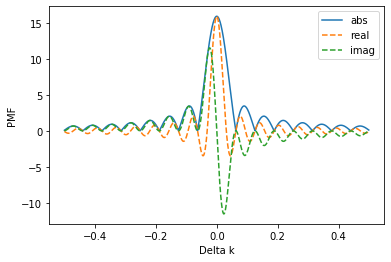

In [4]:
# Compute and plot the phase-matching function (PMF) for an unpoled crystal

domain_config_1 = [1]*number_domains_1
k_array_1 = np.arange(-0.5,0.5,0.001)

crystal_1.compute_pmf(domain_config_1,k_array_1)
crystal_1.plot_pmf()

### Example 2: Periodically-poled crystal

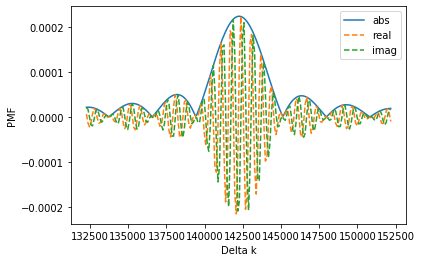

In [5]:
# Create a crystal object

domain_width_2 = 44.1619e-6/2
# domain_width_2=1e-5
number_domains_2 = 100

crystal_2 = Crystal(domain_width_2,number_domains_2,z0=2)

# Compute and plot the phase-matching function (PMF) for an unpoled crystal

k0=np.pi/domain_width_2

domain_config_2 = [1,-1]*int(number_domains_2/2)
k_array_2 = np.arange(k0-1e4,k0+1e4,1e2)

crystal_2.compute_pmf(domain_config_2,k_array_2)
crystal_2.plot_pmf()

In [6]:
from custom_poling.utils.sellmeier import Sellmeier
from custom_poling.utils.mat_func import mat_func

In [7]:
freqs1 = np.arange(1.25e15,1.4e15,.1e13)
freqs2 = np.arange(1.1e15,1.25e15,.1e13)

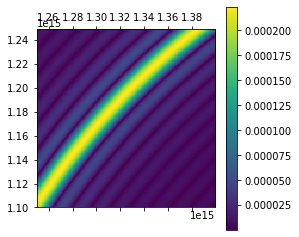

In [8]:
sel_y = Sellmeier(3.0065, 0.03901, 0.04547, 0.01408)
sel_z = Sellmeier(3.3134, 0.05694, 0.05658, 0.01692)

c=3e8
kp = lambda w: w * sel_y.n(2*np.pi*c*1e6/w)/c
ks = lambda w: w * sel_y.n(2*np.pi*c*1e6/w)/c
ki = lambda w: w * sel_z.n(2*np.pi*c*1e6/w)/c

delta_k_func = lambda w1,w2:kp(w1+w2)-ks(w1)-ki(w2)
delta_k_mat = np.array(mat_func(delta_k_func,freqs1,freqs2))

pmf_mat = crystal_2.compute_pmf(domain_config_2,delta_k_mat)

plt.matshow(np.abs(pmf_mat),origin='lower',extent=[freqs1[0],freqs1[-1],freqs2[0],freqs2[-1]]);
plt.colorbar()
plt.show()